# K-Means Clustering

## Import necessary libraries

In [1]:
from copy import deepcopy
import numpy as np                             # linear algebra
import pandas as pd                            # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# Generate Random Data
Generate random data normally distributed around 3 centers, with a noise.

(600, 2)
[[ 0.54469541  0.52769942]
 [ 0.56200408  1.5765126 ]
 [-0.34650961  1.382213  ]
 ...
 [ 8.63239607  2.58056759]
 [ 7.7640709   1.00166485]
 [ 8.01346102  0.96329403]]


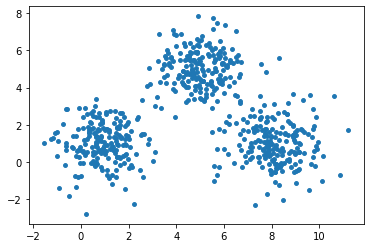

In [9]:
# Set three centers, the model should predict similar results
center_1 = np.array([1,1])
center_2 = np.array([5,5])
center_3 = np.array([8,1])

# Generate random data and center it to the three centers
data_1 = np.random.randn(200, 2) + center_1
#print(data_1)
data_2 = np.random.randn(200, 2) + center_2
data_3 = np.random.randn(200, 2) + center_3

data = np.concatenate((data_1, data_2, data_3), axis = 0)
print(data.shape)
print(data)
plt.scatter(data[:,0], data[:,1], s=15)

# Create K-Means Algorithm
Generate random data normally distributed around 3 centers, with a noise.

In [10]:
data.shape

(600, 2)

In [12]:
# Number of clusters
k = 3
# Number of training data
n = data.shape[0]
# Number of features in the data
c = data.shape[1]

[4.68936236 2.3374759 ]
[3.11369298 2.18596134]
[[7.12549539 2.69262628]
 [9.71015694 2.74672653]
 [4.34877883 6.41810689]]


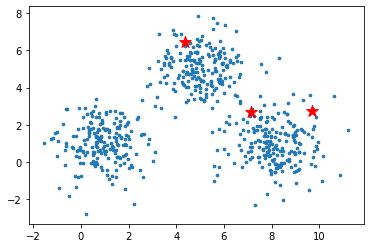

In [15]:
# Generate random centers, here we use sigma(standard deviation) and mean to ensure it represent the whole data
# print(data)
mean = np.mean(data, axis = 0)     # mean correspoding to the columns
#print(mean)
std = np.std(data, axis = 0)       # standard deviation correspoding to the columns
#print(std)

centers = np.random.randn(k,c)*std + mean
print(centers)

# Plot the data and the centers generated as random
plt.scatter(data[:,0], data[:,1], s=7)

plt.scatter(centers[:,0], centers[:,1], marker='*', c='r', s=150)

In [21]:
centers_old = np.zeros(centers.shape)   # to store old centers
#print(centers_old)
centers_new = deepcopy(centers)         # Store new centers

print(data.shape)

clusters = np.zeros(n)
# print(clusters)
distances = np.zeros((n,k))
# print(distances)
# np.linalg => normalize the matrix and vector

error = np.linalg.norm(centers_new - centers_old)
print(error)

# When, after an update, the estimate of that center stays the same, exit loop
count=0
while error != 0:
    # Measure the distance to every center
    for i in range(k):
        distances[:,i] = np.linalg.norm(data - centers[i], axis=1)
    # Assign all training data to closest center
    clusters = np.argmin(distances, axis = 1)
    print(clusters)
    
    centers_old = deepcopy(centers_new)
    # Calculate mean for every cluster and update the center
    for i in range(k):
        centers_new[i] = np.mean(data[clusters == i], axis=0)
    error = np.linalg.norm(centers_new - centers_old)
    print(error) 
    count+=1
    
print(count)

print("Updated centers : ")
print(centers_new)    

(600, 2)
14.830999581709788
[0 2 2 2 0 2 0 0 0 2 2 2 0 2 2 2 2 2 0 2 0 2 0 0 2 0 0 0 2 2 0 2 2 2 2 2 2
 0 0 2 0 0 0 2 0 2 2 0 0 0 0 0 2 2 0 2 2 0 2 2 0 2 0 0 2 2 0 0 0 2 2 2 0 2
 0 2 0 0 0 0 2 0 2 2 2 2 0 2 0 2 0 0 2 0 2 0 2 2 0 0 2 2 0 0 0 0 2 2 2 0 2
 2 2 2 2 0 2 0 2 0 2 2 0 2 2 0 0 0 2 2 0 2 0 2 0 0 2 0 0 2 2 0 2 2 2 2 0 2
 2 2 0 2 2 0 0 0 2 2 2 2 2 0 2 2 0 2 2 2 0 0 2 2 0 2 2 2 2 2 2 0 0 2 2 0 0
 2 0 0 2 0 2 0 2 0 2 0 2 2 0 0 2 0 0 2 2 2 0 2 0 2 2 0 0 2 2 2 2 0 2 0 2 2
 0 2 0 0 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 0 0 2 2 0 2 2 2 0 2 2 2 2 2 2 2 0 2 0 2 2 2 2 2 0 2
 2 0 2 2 0 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 2 2 2 2 2 0 0 0 2 2 2
 2 2 2 2 2 2 2 0 2 2 0 0 2 2 0 2 0 2 0 2 2 2 2 2 2 2 2 2 2 2 0 0 0 2 0 2 2
 0 2 0 2 2 0 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 1 0 0 1 0
 1 1 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0

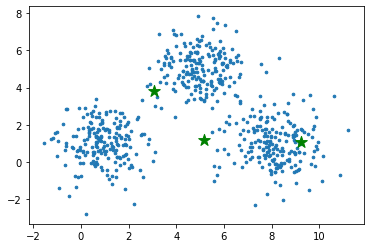

In [24]:
# Plot the data and the centers generated as random
plt.scatter(data[:,0], data[:,1], s=7)
plt.scatter(centers_new[:,0], centers_new[:,1], marker='*', c='g', s=150)

# Test on Iris Dataset

In [4]:
pd.set_option('display.max_rows', 150)
df = pd.read_csv("iris.csv")                      #load the dataset
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [54]:
#df.drop('Id',axis=1,inplace=True) # Se elimina la columna no requerida

In [57]:
df = df.rename(columns={"species" : "Species"})
df.head()

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [65]:
# Change categorical data to number 0-2

df["Species"] = pd.Categorical(df["Species"])
#print(df)
df["Species"] = df["Species"].cat.codes
print(df)

# Change dataframe to numpy matrix

data = df.values[:, 0:4]
print(data)
category = df.values[:, 4]
print(category)

     sepal_length  sepal_width  petal_length  petal_width  Species
0             5.1          3.5           1.4          0.2        0
1             4.9          3.0           1.4          0.2        0
2             4.7          3.2           1.3          0.2        0
3             4.6          3.1           1.5          0.2        0
4             5.0          3.6           1.4          0.2        0
..            ...          ...           ...          ...      ...
145           6.7          3.0           5.2          2.3        2
146           6.3          2.5           5.0          1.9        2
147           6.5          3.0           5.2          2.0        2
148           6.2          3.4           5.4          2.3        2
149           5.9          3.0           5.1          1.8        2

[150 rows x 5 columns]
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 

In [67]:
# Number of clusters
k = 3

# Number of training data
n = data.shape[0]

# Number of features in the data
c = data.shape[1]

# Generate random centers, here we use sigma and mean to ensure it represent the whole data

mean = np.mean(data, axis = 0)
std = np.std(data, axis = 0)
centers = np.random.randn(k,c)*std + mean



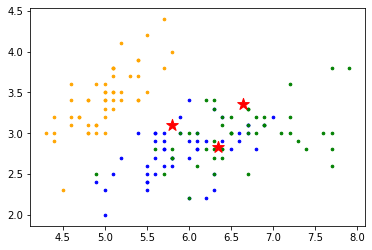

In [69]:
# Plot the data and the centers generated as random
colors=['orange', 'blue', 'green']

for i in range(n):
    plt.scatter(data[i, 0], data[i,1], s=7, color = colors[int(category[i])])
    
plt.scatter(centers[:,0], centers[:,1], marker='*', c='r', s=150)

In [70]:
centers_old = np.zeros(centers.shape) # to store old centers
centers_new = deepcopy(centers) # Store new centers

data.shape
clusters = np.zeros(n)
distances = np.zeros((n,k))

error = np.linalg.norm(centers_new - centers_old)

# When, after an update, the estimate of that center stays the same, exit loop
while error != 0:
    # Measure the distance to every center
    for i in range(k):
        distances[:,i] = np.linalg.norm(data - centers[i], axis=1)
    # Assign all training data to closest center
    clusters = np.argmin(distances, axis = 1)
    
    centers_old = deepcopy(centers_new)
    # Calculate mean for every cluster and update the center
    for i in range(k):
        centers_new[i] = np.mean(data[clusters == i], axis=0)
    error = np.linalg.norm(centers_new - centers_old)
    
centers_new    

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.1       , 2.5       , 3.        , 1.1       ],
       [6.27373737, 2.87575758, 4.92525253, 1.68181818]])

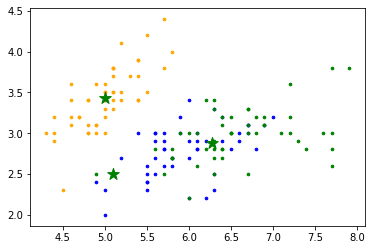

In [71]:
# Plot the data and the centers generated as random

colors=['orange', 'blue', 'green']
for i in range(n):
    plt.scatter(data[i, 0], data[i,1], s=7, color = colors[int(category[i])])
plt.scatter(centers_new[:,0], centers_new[:,1], marker='*', c='g', s=150)